In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [5]:
df = pd.read_csv('Aviation_Data.csv')
df.shape, df.columns


C:\Users\jimmy\AppData\Local\Temp\ipykernel_24784\129566167.py:1: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Aviation_Data.csv')


((90348, 31),
 Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
        'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
        'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
        'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
        'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
        'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
        'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
        'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
        'Publication.Date'],
       dtype='object'))

In [6]:
df.head ()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [17]:
# cleaning the column names
df.columns.str.strip()


Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Country', 'Latitude', 'Longitude', 'Airport.Code', 'Airport.Name',
       'Injury.Severity', 'Aircraft.damage', 'Aircraft.Category',
       'Registration.Number', 'Make', 'Model', 'Amateur.Built',
       'Number.of.Engines', 'Engine.Type', 'FAR.Description', 'Schedule',
       'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [15]:
print(df.columns.tolist())

['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date', 'Country', 'Latitude', 'Longitude', 'Airport.Code', 'Airport.Name', 'Injury.Severity', 'Aircraft.damage', 'Aircraft.Category', 'Registration.Number', 'Make', 'Model', 'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description', 'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status', 'Publication.Date']


In [ ]:
# dropping irrelevant columns
columns_to_drop = ['Event.Id', 'Investigation.Type', 'Publication.Date', 'Amateur.Built', 
                   'Report.Status', 'Weather.Condition', 'Broad.phase.of.flight', 
                   'Event.Date', 'Airport.Name', 'Injury.Severity']
df.drop(columns=columns_to_drop, inplace=True)

In [20]:
print(df.columns.tolist())

['Accident.Number', 'Country', 'Latitude', 'Longitude', 'Airport.Code', 'Aircraft.damage', 'Aircraft.Category', 'Registration.Number', 'Make', 'Model', 'Number.of.Engines', 'Engine.Type', 'FAR.Description', 'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']


In [25]:

df.isnull().sum()

Accident.Number            1459
Country                    1685
Latitude                  55966
Longitude                 55975
Airport.Code              40216
Aircraft.damage            4653
Aircraft.Category         58061
Registration.Number        2841
Make                       1522
Model                      1551
Number.of.Engines          7543
Engine.Type                8555
FAR.Description           58325
Schedule                  77766
Purpose.of.flight          7651
Air.carrier               73700
Total.Fatal.Injuries      12860
Total.Serious.Injuries    13969
Total.Minor.Injuries      13392
Total.Uninjured            7371
dtype: int64

In [27]:
df.head(100)

,Accident.Number,Country,Latitude,Longitude,Airport.Code,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
0,SEA87LA080,United States,NaN,NaN,NaN,Destroyed,NaN,NC6404,Stinson,108-3,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0
1,LAX94LA336,United States,NaN,NaN,NaN,Destroyed,NaN,N5069P,Piper,PA24-180,1.0,Reciprocating,NaN,NaN,Personal,NaN,4.0,0.0,0.0,0.0
2,NYC07LA005,United States,36.922223,-81.878056,NaN,Destroyed,NaN,N5142R,Cessna,172M,1.0,Reciprocating,NaN,NaN,Personal,NaN,3.0,NaN,NaN,NaN
3,LAX96LA321,United States,NaN,NaN,NaN,Destroyed,NaN,N1168J,Rockwell,112,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0
4,CHI79FA064,United States,NaN,NaN,NaN,Destroyed,NaN,N15NY,Cessna,501,NaN,NaN,NaN,NaN,Personal,NaN,1.0,2.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,ANC82DA015,United States,NaN,NaN,NaN,Substantial,Airplane,N1459T,De Havilland,DHC-2-MK3,1.0,Turbo Prop,Part 135: Air Taxi & Commuter,NSCH,Unknown,"Sea Airmotive, Inc.",0.0,0.0,0.0,4.0
96,FTW82FA041,United States,NaN,NaN,NaN,Destroyed,Helicopter,N1081H,Bell Helicopter,206L-1,1.0,Turbo Shaft,Part 135: Air Taxi & Commuter,NSCH,Unknown,Offshore Logistics,1.0,2.0,0.0,0.0
97,NYC82DA023,United States,NaN,NaN,1B7,Substantial,Airplane,N704KE,Cessna,150M,1.0,Reciprocating,Part 91: General Aviation,NaN,Personal,NaN,0.0,0.0,0.0,1.0
98,LAX82FVG14,United States,NaN,NaN,005,Destroyed,Airplane,N63182,Cessna,150M,1.0,Reciprocating,Part 91: General Aviation,NaN,Personal,NaN,1.0,0.0,0.0,0.0


In [28]:
#cleaning missing values for most critical columns for my analysis based on my goal of identifying low risk aircraft (the are make, model, Aircraft category and Total fatal injuries
df.dropna(subset=['Make', 'Model', 'Aircraft.Category', 'Total.Fatal.Injuries'], inplace=True)

In [32]:
df.isnull().sum()

Accident.Number               0
Country                      11
Latitude                   5949
Longitude                  5948
Airport.Code              11445
Aircraft.damage            1354
Aircraft.Category             0
Registration.Number         122
Make                          0
Model                         0
Number.of.Engines          3253
Engine.Type                5328
FAR.Description             608
Schedule                  25403
Purpose.of.flight          4219
Air.carrier               15028
Total.Fatal.Injuries          0
Total.Serious.Injuries      286
Total.Minor.Injuries        328
Total.Uninjured             323
Year                      28540
dtype: int64

In [41]:
# Reloading original dataset because I had droped Event date and i need it to extract the year
import pandas as pd
df_raw = pd.read_csv('Aviation_Data.csv', low_memory=False)

In [42]:
df_raw.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [43]:
# checking if Event dateis present
'Event.Date' in df_raw.columns

True

In [47]:
# Extract Year
df_raw['Year'] = df_raw['Event.Date'].dt.year

In [48]:
# Converting Event.Date to datetime format
df_raw['Event.Date'] = pd.to_datetime(df_raw['Event.Date'], errors='coerce')

In [49]:
# Adding 'Year' back by merging using 'Accident.Number'
df = df.merge(df_raw[['Accident.Number', 'Year']], on='Accident.Number', how='left')

In [50]:
print(df['Year'].isnull().sum())
print(df['Year'].value_counts().sort_index())

0
Year
1982.0    3527
1983.0       4
1984.0       2
1985.0       3
1986.0       5
1987.0       4
1988.0       3
1989.0       5
1990.0      12
1991.0      11
1992.0       4
1993.0       7
1994.0      10
1995.0       6
1996.0       8
1997.0      21
1998.0      13
1999.0      17
2000.0      24
2001.0      50
2002.0      31
2003.0      29
2004.0      19
2005.0      14
2006.0      29
2007.0     161
2008.0    1877
2009.0    1751
2010.0    1753
2011.0    1797
2012.0    1765
2013.0    1520
2014.0    1530
2015.0    1571
2016.0    1662
2017.0    1638
2018.0    1681
2019.0    1623
2020.0    1389
2021.0    1460
2022.0    1648
Name: count, dtype: int64


In [55]:
# Drop rows with Year == 1982 or Year between 2000 and 2022
df_cleaned = df[~((df['Year'] == 1982) | ((df['Year'] >= 2006) & (df['Year'] <= 2022)))]

In [52]:
print(df_cleaned['Year'].value_counts().sort_index())

Year
1983.0     4
1984.0     2
1985.0     3
1986.0     5
1987.0     4
1988.0     3
1989.0     5
1990.0    12
1991.0    11
1992.0     4
1993.0     7
1994.0    10
1995.0     6
1996.0     8
1997.0    21
1998.0    13
1999.0    17
Name: count, dtype: int64


In [56]:
df_filtered = df[(df['Year'] >= 1983) & (df['Year'] <= 2006)]

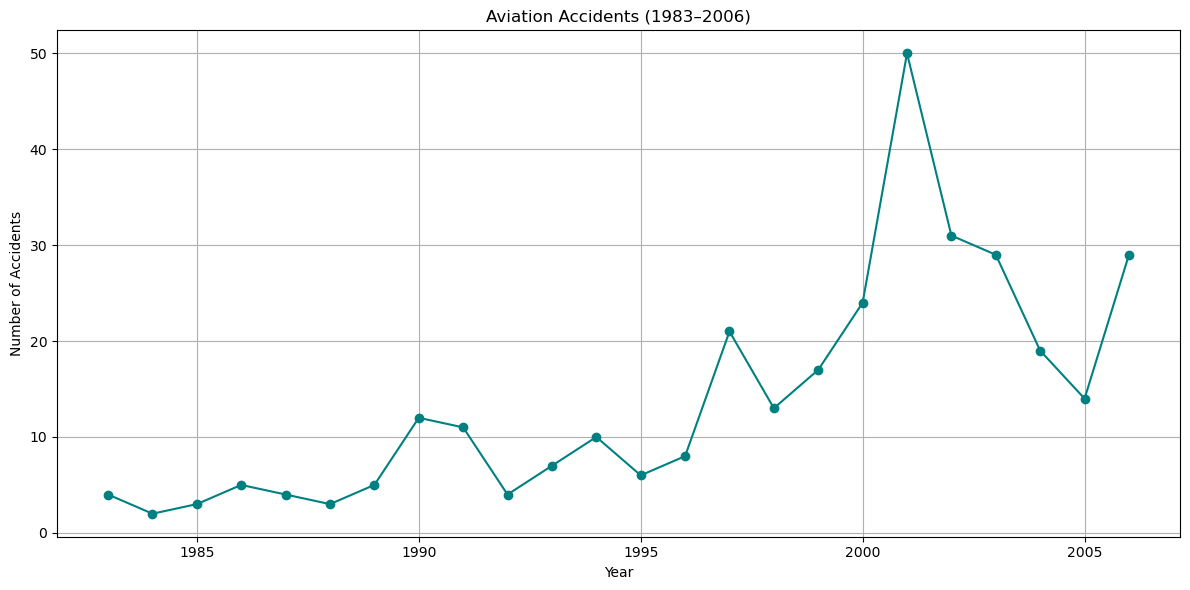

In [57]:
#EDA
#accidents over time
import matplotlib.pyplot as plt

accidents_per_year = df_filtered['Year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.plot(accidents_per_year.index, accidents_per_year.values, marker='o', linestyle='-', color='teal')
plt.title('Aviation Accidents (1983–2006)')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.tight_layout()
plt.show()

In [33]:
df['Year'].value_counts().sort_index()

Series([], Name: count, dtype: int64)

In [34]:
print(df['Year'].isnull().sum())  # Number of missing values
print(len(df))                    # Total number of rows
print(df['Year'].unique())        # Check unique values (may show all NaN)

28540
28540
[nan]


In [58]:
# EDA, most common aircraft
df['Aircraft_Type'] = df['Make'] + ' ' + df['Model']

In [59]:
most_common_aircraft = df['Aircraft_Type'].value_counts().head(10)
print(most_common_aircraft)

Aircraft_Type
CESSNA 172                 493
BOEING 737                 374
Cessna 172                 324
CESSNA 152                 196
CESSNA 182                 193
CESSNA 172S                188
Cessna 152                 182
PIPER PA28                 179
CESSNA 172N                164
CIRRUS DESIGN CORP SR22    143
Name: count, dtype: int64


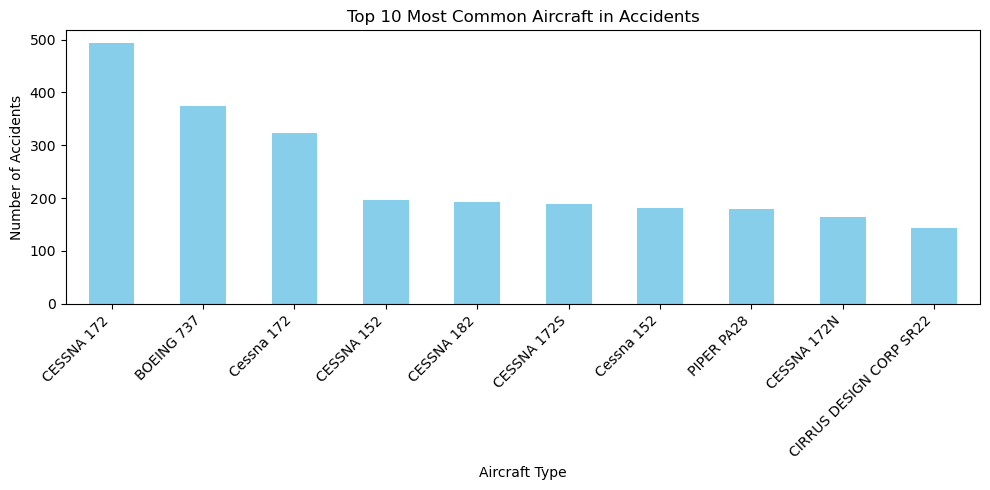

In [60]:
# visualization using bar chart
import matplotlib.pyplot as plt

most_common_aircraft.plot(kind='bar', figsize=(10,5), color='skyblue')
plt.title('Top 10 Most Common Aircraft in Accidents')
plt.xlabel('Aircraft Type')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [64]:
#EDA, Fatal injury by craft
# cleaning
df = df.dropna(subset=['Make', 'Model', 'Total.Fatal.Injuries'])
df['Total.Fatal.Injuries'] = pd.to_numeric(df['Total.Fatal.Injuries'], errors='coerce')

In [65]:
# creating a new comnined column for Aircraft Type
df['Aircraft_Type'] = df['Make'] + ' ' + df['Model']

In [66]:
fatal_injuries_by_aircraft = df.groupby('Aircraft_Type')['Total.Fatal.Injuries'].sum().sort_values(ascending=False).head(10)
print(fatal_injuries_by_aircraft)

Aircraft_Type
BOEING 737                1341.0
BOEING 777 - 206           534.0
AIRBUS A321                381.0
AIRBUS A330                331.0
Boeing 747-300             228.0
AIRBUS A320                170.0
Airbus Industrie A 310     169.0
AIRBUS A320 - 216          162.0
CESSNA 172                 162.0
Boeing B757                160.0
Name: Total.Fatal.Injuries, dtype: float64


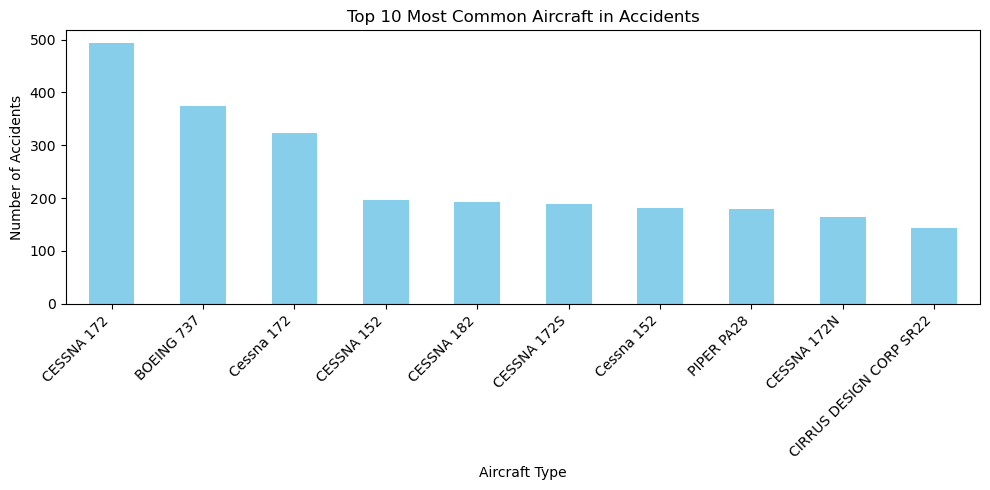

In [67]:
import matplotlib.pyplot as plt

most_common_aircraft.plot(kind='bar', figsize=(10,5), color='skyblue')
plt.title('Top 10 Most Common Aircraft in Accidents')
plt.xlabel('Aircraft Type')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()